In [55]:
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
nba = pd.read_csv("..\\data\\nba\\nba_contracts_history_2.csv").dropna(how='all')

In [57]:
nba.head()

,NAME,CONTRACT_START,CONTRACT_END,AVG_SALARY,AGE,GP,W,L,MIN,PTS,...,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-
0,Wesley Matthews,2019,2020,2564753.0,32.0,69.0,27.0,42.0,2091.0,840.0,...,81.0,32.0,138.0,170.0,160.0,91.0,54.0,17.0,160.0,-90.0
1,Brook Lopez,2015,2017,21165675.0,27.0,72.0,34.0,38.0,2100.0,1236.0,...,81.4,214.0,321.0,535.0,50.0,104.0,43.0,126.0,206.0,-104.0
2,DeAndre Jordan,2011,2014,10759763.5,22.0,80.0,31.0,49.0,2047.0,566.0,...,45.2,207.0,368.0,575.0,42.0,101.0,41.0,142.0,255.0,-100.0
3,Markieff Morris,2015,2018,8143323.5,25.0,82.0,39.0,43.0,2581.0,1258.0,...,76.3,110.0,396.0,506.0,192.0,170.0,101.0,39.0,245.0,105.0
4,Dwight Howard,2018,2019,13410739.0,32.0,81.0,35.0,46.0,2463.0,1347.0,...,57.4,255.0,757.0,1012.0,105.0,208.0,48.0,131.0,249.0,89.0


In [58]:
nba.columns

Index(['NAME', 'CONTRACT_START', 'CONTRACT_END', 'AVG_SALARY', 'AGE', 'GP',
       'W', 'L', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF',
       '+/-'],
      dtype='object')

In [59]:
nba = nba[['NAME', 'CONTRACT_START', 'CONTRACT_END', 'AVG_SALARY', 'AGE', 'GP', 'W', 'L', 'MIN','+/-']].drop_duplicates()

In [60]:
nba = nba[['CONTRACT_START', 'CONTRACT_END', 'AVG_SALARY', 'AGE', 'GP', 'W', 'L', 'MIN','+/-']].drop_duplicates()

In [61]:
nba.corr()

,CONTRACT_START,CONTRACT_END,AVG_SALARY,AGE,GP,W,L,MIN,+/-
CONTRACT_START,1.000000,0.851893,-0.086268,0.223103,-0.041952,-0.084682,0.031778,-0.189422,-0.130811
CONTRACT_END,0.851893,1.000000,0.172655,0.149772,0.082290,0.075979,0.038110,0.063835,0.031115
AVG_SALARY,-0.086268,0.172655,1.000000,0.163384,0.321118,0.440450,-0.011722,0.650799,0.511799
AGE,0.223103,0.149772,0.163384,1.000000,0.187314,0.192270,0.065215,0.218862,0.118044
GP,-0.041952,0.082290,0.321118,0.187314,1.000000,0.742204,0.664951,0.789263,0.165053
W,-0.084682,0.075979,0.440450,0.192270,0.742204,1.000000,-0.007015,0.618043,0.659790
L,0.031778,0.038110,-0.011722,0.065215,0.664951,-0.007015,1.000000,0.488881,-0.489038
MIN,-0.189422,0.063835,0.650799,0.218862,0.789263,0.618043,0.488881,1.000000,0.331420
+/-,-0.130811,0.031115,0.511799,0.118044,0.165053,0.659790,-0.489038,0.331420,1.000000


Text(0.5, 0, 'Salario promedio')

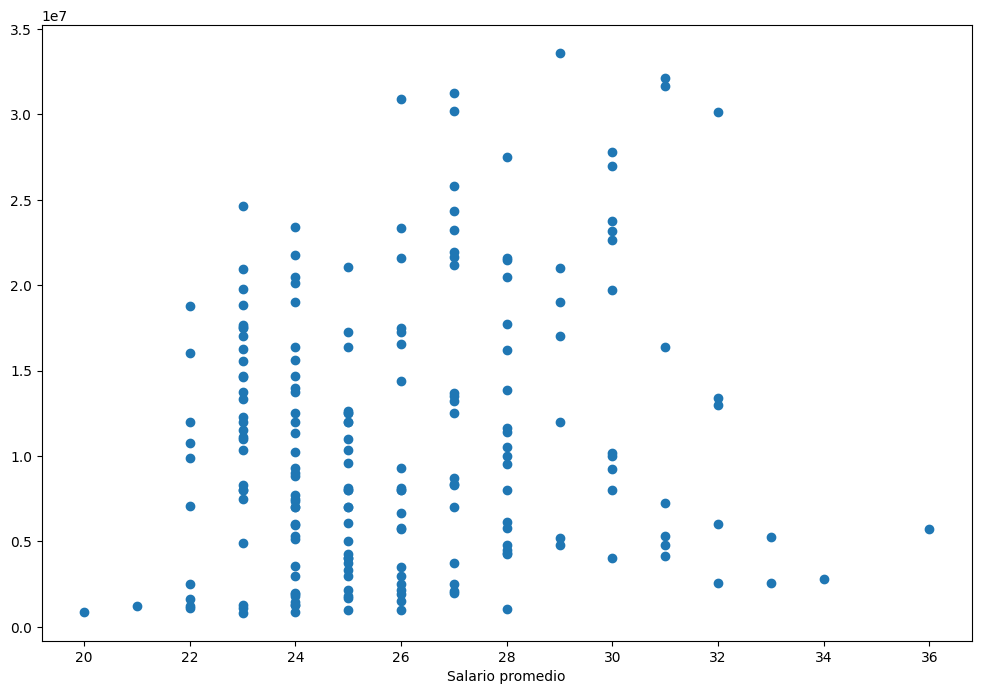

In [62]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(nba['AGE'], nba['AVG_SALARY'])

plt.xlabel('Edad')
plt.xlabel('Salario promedio')

Text(0.5, 0, 'Salario promedio')

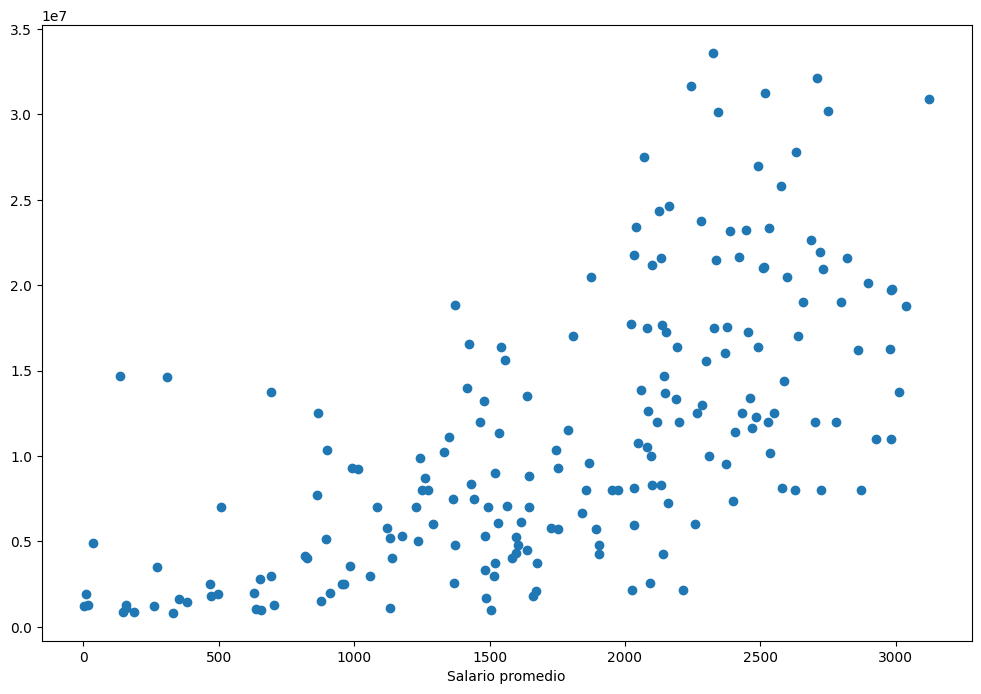

In [63]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(nba['MIN'], nba['AVG_SALARY'])

plt.xlabel('Minutos jugados')
plt.xlabel('Salario promedio')

Using sklearn

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [65]:
X = nba[['AGE', 'MIN', '+/-']]
Y = nba['AVG_SALARY']

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [66]:
linear_model = LinearRegression().fit(x_train, y_train)

In [67]:
predictors = x_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()
coef

AGE    -1948.029697
MIN     5238.333975
+/-    11129.559096
dtype: float64

In [68]:
linear_model.intercept_

1164860.1338986754

In [69]:
y_pred = linear_model.predict(x_test)
y_pred

array([11011052.96885451, 16664646.39401531, 17555692.29831921,
       16906887.56646755, 18001815.529232  , 16834216.54984473,
        9239632.76397033,  3198960.32847048,  5764434.54801864,
       10623288.53363352, 17459404.08161652, 18864070.36062234,
        8784407.67342395,  9423710.96872541, 16196422.17560573,
        1157017.24096678, 12533360.69017003, 10610166.24573493,
        7496972.61224474,  7260989.70809526,  8889785.58439001,
       10038009.78129282,  2266183.52479025, 18166897.55372472,
       14095757.50131862, 17426289.69325282, 11317570.01066407,
       14058519.90066642,  5545112.38671151,  1329695.24346146,
        4340422.37450329, 14739943.34130938,  9330647.67603828,
        3096710.33899687,  7936838.18500766, 16821415.69072441,
       10558101.29151196, 11525846.24119249, 12895026.80845688,
       20029913.4925469 ])

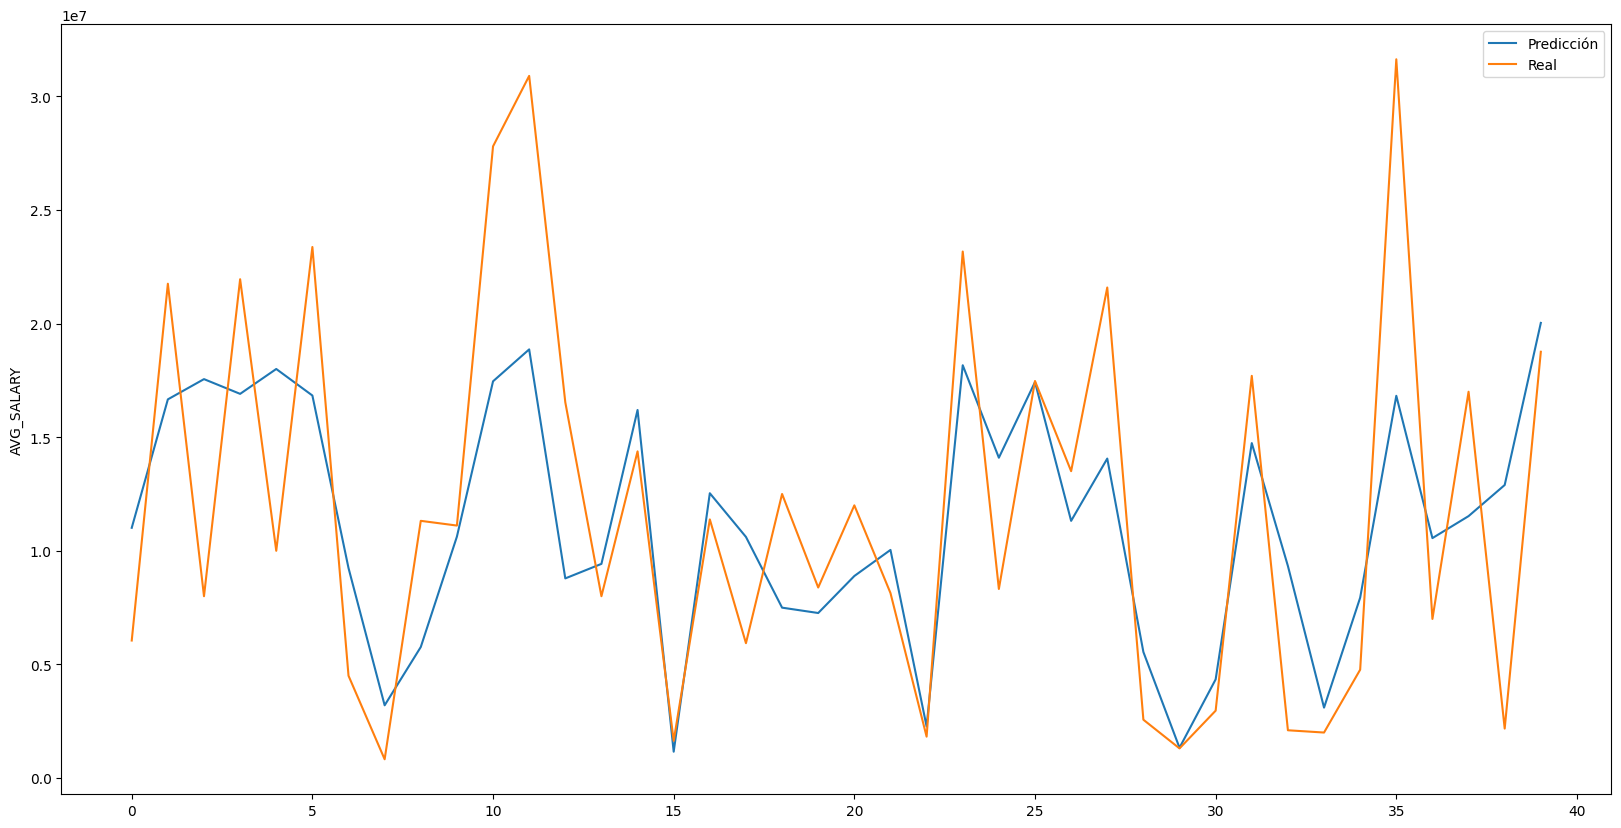

In [70]:
plt.figure(figsize = (20,10))

plt.plot(y_pred, label='Predicción')
plt.plot(y_test.values, label='Real')

plt.ylabel('AVG_SALARY')

plt.legend()
plt.show()

In [73]:
Y_example = linear_model.predict([[20,1350,80]])

c:\Users\h\Documents\geeklogbook\utilities\python\notebooks\.env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [74]:
int(Y_example)

C:\Users\h\AppData\Local\Temp\ipykernel_12928\3448946777.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(Y_example)


9088015